In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from skimage.exposure import rescale_intensity
from skimage.morphology import reconstruction
from skimage.feature import hog
from skimage import exposure

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

import sys

sys.path.append('drive/My Drive/Colab Notebooks/Redes_neurais/')

Mounted at /content/drive




*   Importando as imagens



In [ ]:
features = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/features.csv',header = None)
responses = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/responses.csv')


Primeiramente veremos como dos dataframes são entregues. Temos que no conjunto `features` as imagens vem em um vetor com 12100 pixels.

In [ ]:
print(features.shape)
print(responses.shape)

(7000, 12100)
(7000, 4)


Temos que os labels das imagens é somente a coluna `Volcano?`.

In [ ]:
responses = responses['Volcano?']




*   Agora iremos começar a separar nossos dados. Como pedido iremos separar o conjunto, em $80\%$ para treinamento e os $20\%$ restante para validação. Como temos um conjunto com 7000 imagens, temos que 5600 será o conjunto treino e 1400 para o conjunto validação. Ainda na célula abaixo, iremos transformar o conjunto em numpy.array.



In [ ]:
features = features.to_numpy()


In [ ]:
x_train = features[:5600]
x_val = features[5600:7000]


In [ ]:
y_train = responses[:5600]
y_val = responses[5600:7000]



*  Com esse novo recorte no conjunto, temos que a porporção de vulcões no conjunto de treino, é de:





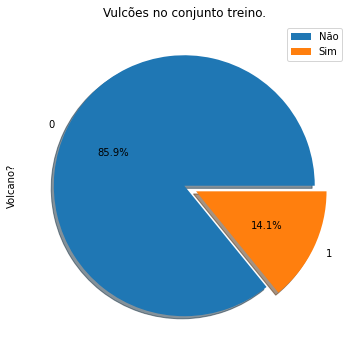

In [ ]:
y_train.value_counts().plot(
    kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title('Vulcões no conjunto treino.',)
plt.legend(['Não', 'Sim'])
plt.show()

Iniciaremos o treinamento. Primeiramente mudaremos a escala.

In [ ]:
x_train = x_train/255.0
x_val = x_val/255.0

Agora remodelamos os formatos para ajustarmos para a entrada da rede.

In [ ]:
x_train = np.resize(x_train, (5600, 110, 110, 1))
x_val = np.resize(x_val,(1400,110,110,1))

In [ ]:
y_train =y_train.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
y_train = to_categorical(y_train, num_classes = 2)

In [ ]:
y_val = to_categorical(y_val, num_classes = 2)



*   Primeira Rede com três camadas convolucional.




In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(110, 110, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(8, (2,2), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(x_train, y_train, epochs=7, steps_per_epoch= 100)
model1.evaluate(x_val,  y_val, verbose=2)

Epoch 1/7
100/100 [==============================] - 44s 433ms/step - loss: 0.4293 - accuracy: 0.8586
Epoch 2/7
100/100 [==============================] - 43s 434ms/step - loss: 0.4069 - accuracy: 0.8586
Epoch 3/7
100/100 [==============================] - 43s 432ms/step - loss: 0.4034 - accuracy: 0.8586
Epoch 4/7
100/100 [==============================] - 43s 433ms/step - loss: 0.4051 - accuracy: 0.8586
Epoch 5/7
100/100 [==============================] - 43s 432ms/step - loss: 0.4014 - accuracy: 0.8586
Epoch 6/7
100/100 [==============================] - 43s 429ms/step - loss: 0.4030 - accuracy: 0.8586
Epoch 7/7
100/100 [==============================] - 43s 432ms/step - loss: 0.3960 - accuracy: 0.8586
44/44 - 3s - loss: 0.3977 - accuracy: 0.8514


[0.397743821144104, 0.8514285683631897]

Podemos observar que o modelo encontra um mínimo global, e permanece neste ponto, mesmo que função de perda diminua um pouco. Mas podemos ver que no conjunto validação a acuracia é de $ 85\%$ .



*   Outro novo modelo de rede neural



In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), activation='relu', input_shape=(110, 110, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

In [ ]:
model2.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train, epochs=7, steps_per_epoch= 100)
model2.evaluate(x_val,  y_val, verbose=2)

Epoch 1/7
100/100 [==============================] - 33s 321ms/step - loss: 0.4170 - accuracy: 0.8525
Epoch 2/7
100/100 [==============================] - 32s 322ms/step - loss: 0.3917 - accuracy: 0.8586
Epoch 3/7
100/100 [==============================] - 33s 327ms/step - loss: 0.3229 - accuracy: 0.8689
Epoch 4/7
100/100 [==============================] - 33s 328ms/step - loss: 0.2104 - accuracy: 0.9243
Epoch 5/7
100/100 [==============================] - 33s 329ms/step - loss: 0.1670 - accuracy: 0.9404
Epoch 6/7
100/100 [==============================] - 33s 327ms/step - loss: 0.1497 - accuracy: 0.9479
Epoch 7/7
100/100 [==============================] - 33s 332ms/step - loss: 0.1350 - accuracy: 0.9529
44/44 - 3s - loss: 0.1858 - accuracy: 0.9293


[0.18575841188430786, 0.9292857050895691]

Podemos ver que esse modelo performou de forma melhor, obtendo $92\%$ no conjunto de validação.



*   Suavização das imagens




Utilizando as recomendações do professor Hugo Carvalho, utilizei os seguintes métodos.



*   Holes 



tutorial :
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_holes_and_peaks.html#sphx-glr-auto-examples-features-detection-plot-holes-and-peaks-py

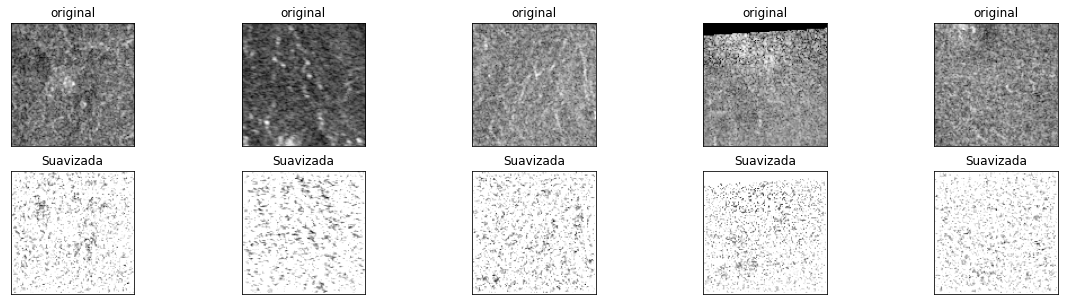

In [ ]:
n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  img = np.array(features[i]).reshape((110,110))
  plt.imshow(img)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  img = np.array(features[i]).reshape((110,110))
  image = rescale_intensity(img, in_range=(50, 200))
  seed = np.copy(image)
  seed[1:-1, 1:-1] = image.max()
  mask = image

  filled = reconstruction(seed, mask, method='erosion')
  plt.imshow(image-filled)
  plt.title("Suavizada")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Passando todas as imagens para esse método.


In [ ]:
holes = np.zeros((features.shape))
for i in range(features.shape[0]):    
    img = np.array(features[i]).reshape((110,110))
    image = rescale_intensity(img, in_range=(50, 200))
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.max()
    mask = image
    filled = reconstruction(seed, mask, method='erosion')
    holes[i] = ((image-filled).flatten())



*   Local Equalize




Tutorial:
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html#sphx-glr-auto-examples-color-exposure-plot-local-equalize-py

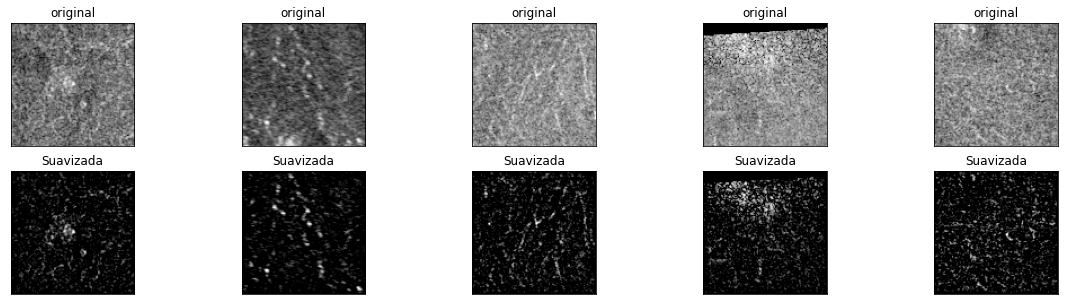

In [ ]:
n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  img = np.array(features[i]).reshape((110,110))
  plt.imshow(img)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  img = np.array(features[i]).reshape((110,110))
  image = rescale_intensity(img, in_range=(50, 200))
  mask = image
  seed = np.copy(image)
  seed[1:-1, 1:-1] = image.min()
  rec = reconstruction(seed, mask, method='dilation')
  plt.imshow(image-rec)
  plt.title("Suavizada")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Passando todas as imagens para esse modelo.

In [ ]:
Local = np.zeros((features.shape))
for i in range(features.shape[0]):    
    img = np.array(features[i]).reshape((110,110))
    image = rescale_intensity(img, in_range=(50, 200))
    mask = image
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    rec = reconstruction(seed, mask, method='dilation')
    Local[i] = ((image-rec).flatten())


*   Agora vamos ajeitas os dados das nossas novas imagens para que possamos usar nos nossos modelos.



In [ ]:
holes_train = holes[:5600]
holes_val = holes[5600:7000]


In [ ]:
holes_train = holes_train/255.0
holes_val = holes_val/255.0

In [ ]:
local_train = Local[:5600]
local_val = Local[5600:7000]
local_train = local_train/255.0
local_val = local_val/255.0

In [ ]:
holes_train = np.resize(holes_train,(5600,110,110,1))
holes_val = np.resize(holes_val,(1400,110,110,1))
local_train = np.resize(local_train,(5600,110,110,1))

In [ ]:
local_val = np.resize(local_val,(1400,110,110,1))

Usarei no primeiro momento a rede que performou melhor anteriomente.

Treinamento com o método do Local.

In [ ]:
model2.fit(local_train, y_train, epochs=5, steps_per_epoch= 100)
model2.evaluate(local_val,  y_val, verbose=2)

Epoch 1/5
100/100 [==============================] - 34s 336ms/step - loss: 756379845394432.0000 - accuracy: 0.9336
Epoch 2/5
100/100 [==============================] - 33s 327ms/step - loss: 51181195886592.0000 - accuracy: 0.9623
Epoch 3/5
100/100 [==============================] - 33s 329ms/step - loss: 15772767223808.0000 - accuracy: 0.9712
Epoch 4/5
100/100 [==============================] - 33s 335ms/step - loss: 5947736457216.0000 - accuracy: 0.9820
Epoch 5/5
100/100 [==============================] - 33s 329ms/step - loss: 2466004598784.0000 - accuracy: 0.9895
44/44 - 3s - loss: 41782796615680.0000 - accuracy: 0.9464


[41782796615680.0, 0.9464285969734192]

In [ ]:
model1.fit(local_train, y_train, epochs=7, steps_per_epoch= 100)
model1.evaluate(local_val,  y_val, verbose=2)

Epoch 1/7
100/100 [==============================] - 43s 425ms/step - loss: 8973360037888.0000 - accuracy: 0.5077
Epoch 2/7
100/100 [==============================] - 43s 425ms/step - loss: 0.5591 - accuracy: 0.8586
Epoch 3/7
100/100 [==============================] - 43s 426ms/step - loss: 0.4972 - accuracy: 0.8586
Epoch 4/7
100/100 [==============================] - 43s 425ms/step - loss: 0.4637 - accuracy: 0.8586
Epoch 5/7
100/100 [==============================] - 43s 426ms/step - loss: 0.4436 - accuracy: 0.8586
Epoch 6/7
100/100 [==============================] - 42s 424ms/step - loss: 0.4310 - accuracy: 0.8586
Epoch 7/7
100/100 [==============================] - 42s 425ms/step - loss: 0.4230 - accuracy: 0.8586
44/44 - 3s - loss: 0.4294 - accuracy: 0.8514


[0.4294106662273407, 0.8514285683631897]

Treinamento para o método do Hole.

In [ ]:
model2.fit(holes_train, y_train, epochs=5, steps_per_epoch= 100)
model2.evaluate(holes_val,  y_val, verbose=2)

Epoch 1/5
100/100 [==============================] - 33s 328ms/step - loss: 13751601332224.0000 - accuracy: 0.7161
Epoch 2/5
100/100 [==============================] - 33s 328ms/step - loss: 993168785408.0000 - accuracy: 0.8182
Epoch 3/5
100/100 [==============================] - 33s 331ms/step - loss: 542678614016.0000 - accuracy: 0.8370
Epoch 4/5
100/100 [==============================] - 33s 328ms/step - loss: 385122959360.0000 - accuracy: 0.8496
Epoch 5/5
100/100 [==============================] - 33s 326ms/step - loss: 289581662208.0000 - accuracy: 0.8545
44/44 - 2s - loss: 1187650076672.0000 - accuracy: 0.8414


[1187650076672.0, 0.8414285778999329]

In [ ]:
model1.fit(holes_train, y_train, epochs=7, steps_per_epoch= 100)
model1.evaluate(holes_val,  y_val, verbose=2)

Epoch 1/7
100/100 [==============================] - 43s 428ms/step - loss: 0.4175 - accuracy: 0.8586
Epoch 2/7
100/100 [==============================] - 42s 423ms/step - loss: 0.4140 - accuracy: 0.8586
Epoch 3/7
100/100 [==============================] - 42s 423ms/step - loss: 0.4117 - accuracy: 0.8586
Epoch 4/7
100/100 [==============================] - 42s 424ms/step - loss: 0.4101 - accuracy: 0.8586
Epoch 5/7
100/100 [==============================] - 42s 424ms/step - loss: 0.4091 - accuracy: 0.8586
Epoch 6/7
100/100 [==============================] - 42s 421ms/step - loss: 0.4085 - accuracy: 0.8586
Epoch 7/7
100/100 [==============================] - 42s 423ms/step - loss: 0.4081 - accuracy: 0.8586
44/44 - 3s - loss: 0.4203 - accuracy: 0.8514


[0.42031019926071167, 0.8514285683631897]

Podemos ver que aconteceu algo bem estranho, o modelo `Model2` avaliados nessas novas imagens apresenta uma acuracia alta, porém com uma função de perda bastante alta, algo que nao consegui explicar. Porem no `Model1`, a função de perda nao ficou muito alta e a acuracia se manteve como no treinamento com o conjunto x_train. No modelo `Model1`, que parece mais confiavel, podemos ver que a acucaria nao melhorou consideravel em relação as imagens originais.

Como comentei com o senhor, encontrei o conjunto test desses dados. Irei usar nesse momento, rodando nos modelos que ja treinamos.

In [ ]:
x_test = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/test_images.csv',header = None)
y_test = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/test_labels.csv')



*   Arrumando os dados



In [ ]:
x_test = x_test.to_numpy()

In [ ]:
y_test = y_test['Volcano?']

In [ ]:
x_test = np.resize(x_test,(2734,110,110,1))
y_test = to_categorical(y_test, num_classes = 2)

Com isso podemos já rodar nos nossos modelos.

In [ ]:
model1.evaluate(x_test,  y_test, verbose=2)

86/86 - 6s - loss: 0.4376 - accuracy: 0.8413


[0.43762949109077454, 0.8412582278251648]

In [ ]:
model2.evaluate(x_test,y_test)

86/86 [==============================] - 6s 64ms/step - loss: 23.8713 - accuracy: 0.8405


[23.87125015258789, 0.8405267000198364]